In [10]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import Sequential

In [11]:
data=pd.read_csv("C:\\Users\\DELL\\Desktop\\Fraud Detection Dataset.csv")

In [12]:
data.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [14]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [15]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [16]:

obj_cols = data.select_dtypes(include='object').columns
obj_cols

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

In [17]:
for i in obj_cols:
    print(f'Number of unique values in {i} : {data[i].nunique()}')
    print(f'Unique Value {i}\n:{data[i].unique()}\n')
    print(data[i].value_counts())
    print('----------------------------------------------')

Number of unique values in type : 5
Unique Value type
:['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64
----------------------------------------------
Number of unique values in nameOrig : 6353307
Unique Value nameOrig
:['C1231006815' 'C1666544295' 'C1305486145' ... 'C1162922333' 'C1685995037'
 'C1280323807']

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: count, Length: 6353307, dtype: int64
----------------------------------------------
Number of unique values in nameDest : 2722362
Unique Value nameDest
:['M1979787155' 'M2044282225' 'C553264065' ... 'C1850423904' 'C1881841831'
 'C2080388513']

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
   

<Axes: xlabel='type', ylabel='count'>

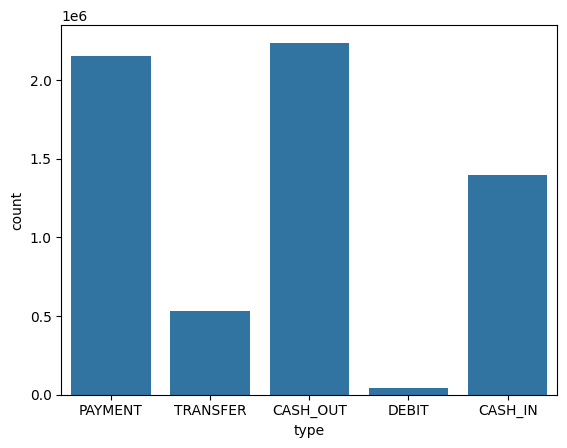

In [18]:
sns.countplot(x='type', data=data)

<Axes: xlabel='type', ylabel='amount'>

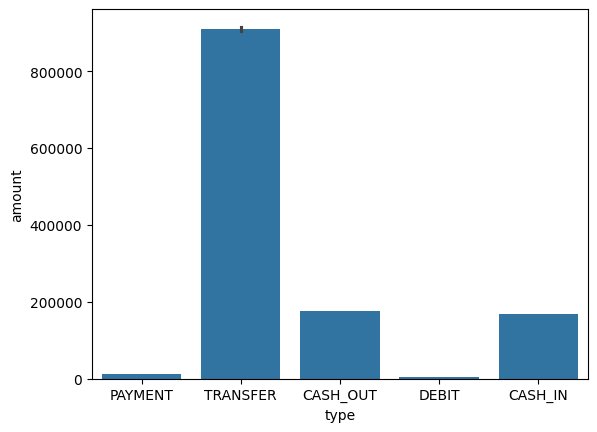

In [19]:
sns.barplot(x='type', y='amount', data=data)

In [20]:

data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [21]:
data['diffOrg'] = data['oldbalanceOrg']-data['newbalanceOrig']
data['diffDest'] = data['oldbalanceDest'] - data['newbalanceDest']

In [22]:
data = data.drop(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'nameOrig', 'nameDest'], axis=1)

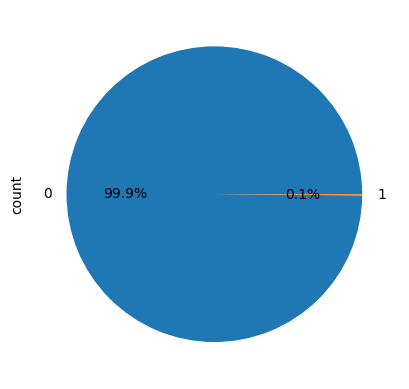

In [23]:
data['isFraud'].value_counts().plot.pie(autopct='%1.1f%%');

In [24]:
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)
print(f'Train data shape : {train_data.shape}') 
print(f'Test data shape : {test_data.shape}')

Train data shape : (4453834, 7)
Test data shape : (1908786, 7)


In [25]:
x = train_data.drop('isFraud', axis=1)
y = train_data['isFraud']

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.25, random_state=42)

In [26]:
x_train.sample(8)

,step,type,amount,isFlaggedFraud,diffOrg,diffDest
692494,36,CASH_IN,50158.53,0,-50158.53,50158.53
4336738,308,PAYMENT,12449.41,0,12449.41,0.00
34228,8,CASH_OUT,233148.39,0,0.00,-1746160.49
3882702,283,CASH_IN,23257.49,0,-23257.49,23257.49
2554371,206,CASH_OUT,186262.79,0,11994.00,-186262.79
4550102,327,PAYMENT,19901.13,0,19901.13,0.00
5840902,402,CASH_OUT,75377.29,0,10400.00,-75377.29
1004800,46,CASH_IN,71899.40,0,-71899.40,71899.40


In [27]:
le = LabelEncoder()
x_train['type'] = le.fit_transform(x_train['type'])
x_valid['type'] = le.transform(x_valid['type'])

x_train.sample(4)


,step,type,amount,isFlaggedFraud,diffOrg,diffDest
5411679,378,3,1291.82,0,0.00,0.00
525080,20,0,146841.01,0,-146841.01,0.00
1070790,129,1,214819.25,0,0.00,-214819.25
1167034,132,0,47764.25,0,-47764.26,47764.25


In [28]:
rs = RobustScaler()
x_train = rs.fit_transform(x_train)
x_valid = rs.transform(x_valid)

In [29]:
x_train[12]

array([-3.07262570e-01,  1.50000000e+00,  1.08382566e-03,  0.00000000e+00,
        0.00000000e+00, -5.04236990e-01])

In [30]:
# Let's apply SMOTE (over sampling technique) to make data balance
sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

In [31]:
x_train_res.shape

(6672114, 6)

In [32]:
model.evaluate(x_valid, y_valid)

In [35]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [36]:
callbacks = tf.keras.callbacks.EarlyStopping(patience=4, monitor='val_loss', mode='min')
history = model.fit(x_train_res, y_train_res, epochs=20, steps_per_epoch=100000, validation_data=(x_valid, y_valid), callbacks=[callbacks])


Epoch 1/20
 99576/100000 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9742 - loss: 0.0646

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


100000/100000 ━━━━━━━━━━━━━━━━━━━━ 477s 5ms/step - accuracy: 0.9742 - loss: 0.0645 - val_accuracy: 0.9628 - val_loss: 0.0652
Epoch 2/20
100000/100000 ━━━━━━━━━━━━━━━━━━━━ 461s 5ms/step - accuracy: 0.9801 - loss: 0.0491 - val_accuracy: 0.9650 - val_loss: 0.0629
Epoch 3/20
100000/100000 ━━━━━━━━━━━━━━━━━━━━ 422s 4ms/step - accuracy: 0.9808 - loss: 0.0474 - val_accuracy: 0.9675 - val_loss: 0.0611
Epoch 4/20
100000/100000 ━━━━━━━━━━━━━━━━━━━━ 2200s 22ms/step - accuracy: 0.9812 - loss: 0.0468 - val_accuracy: 0.9676 - val_loss: 0.0617
Epoch 5/20
100000/100000 ━━━━━━━━━━━━━━━━━━━━ 421s 4ms/step - accuracy: 0.9817 - loss: 0.0454 - val_accuracy: 0.9705 - val_loss: 0.0528
Epoch 6/20
100000/100000 ━━━━━━━━━━━━━━━━━━━━ 540s 5ms/step - accuracy: 0.9819 - loss: 0.0452 - val_accuracy: 0.9682 - val_loss: 0.0578
Epoch 7/20
100000/100000 ━━━━━━━━━━━━━━━━━━━━ 493s 5ms/step - accuracy: 0.9822 - loss: 0.0551 - val_accuracy: 0.9688 - val_loss: 0.0570
Epoch 8/20
100000/100000 ━━━━━━━━━━━━━━━━━━━━ 559s 6ms/st

In [37]:
test_data.sample(6)    

,step,type,amount,isFraud,isFlaggedFraud,diffOrg,diffDest
926811,43,CASH_IN,302077.29,0,0,-302077.29,302077.30
4484718,324,CASH_OUT,238063.98,0,0,1318.00,-238063.98
2961978,230,CASH_IN,303171.27,0,0,-303171.27,303171.28
3926490,285,CASH_OUT,205937.06,0,0,30268.00,-205937.06
722170,37,PAYMENT,30592.81,0,0,13595.00,0.00
5149927,357,TRANSFER,65648.19,0,0,0.00,-65648.19


In [38]:
x_test = test_data.drop('isFraud', axis=1)
y_test = test_data['isFraud']

x_test['type'] = le.transform(x_test['type'])
x_test = rs.transform(x_test)


In [39]:
x_test[12]

array([-0.15642458,  0.        ,  0.40238825,  0.        ,  2.01773749,
       -1.02966379])

In [40]:
model.evaluate(x_valid, y_valid)

34796/34796 ━━━━━━━━━━━━━━━━━━━━ 64s 2ms/step - accuracy: 0.9702 - loss: 0.0528


[0.052259113639593124, 0.9701650738716125]

In [41]:
model.evaluate(x_test, y_test)

59650/59650 ━━━━━━━━━━━━━━━━━━━━ 109s 2ms/step - accuracy: 0.9706 - loss: 0.0513


[0.05239978805184364, 0.9704791307449341]

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

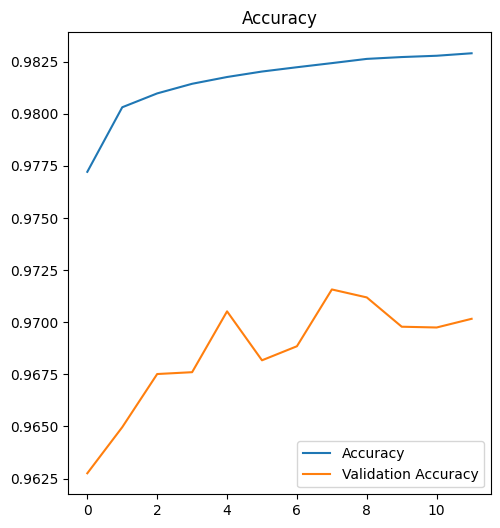

In [43]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(range(len(acc)), acc, label='Accuracy');
plt.plot(range(len(acc)), val_acc, label='Validation Accuracy');
plt.title('Accuracy')
plt.legend();


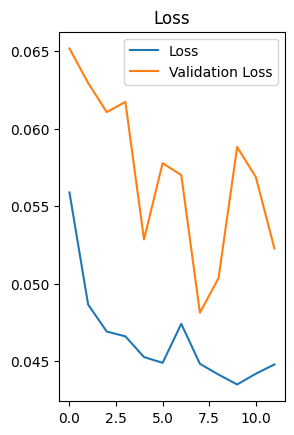

In [44]:
plt.subplot(122)
plt.plot(range(len(loss)), loss, label='Loss');
plt.plot(range(len(loss)), val_loss, label='Validation Loss');
plt.title('Loss')
plt.legend();